# DataFrame Visualizations

## Objectives

- To demonstrate pandas' capabilities in data visualization using a variety of plot types.
- To provide insights into the distribution and relationships within the tips dataset through visual analysis.

## Background

Pandas, a cornerstone in Python data analysis, offers an intuitive interface for creating a wide range of plots from DataFrames. This notebook utilizes pandas to visualize data from a restaurant tips dataset, highlighting its ability to render insights accessible and the data exploration process more intuitive.

## Datasets Used

The dataset in focus is `tips.csv`, which contains more than two hundred observations on restaurant tips. Due to its diverse data types and real-world applicability, this dataset is ideal for demonstrating various plotting techniques.

## Loading the Tips Dataset

Pandas provides the basics to easily create decent looking plots with minimum effort. 

In [1]:
import pandas as pd

Let's load a csv data file: tips.csv into a DataFrame:

In [2]:
path = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(path)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Analysing and Visualizing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Male vs. Female

Counting the number of Male and Female cases in the data:

In [4]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

We can use plot() to graph two bars with previous information: the dataset has 157 males and 87 females.

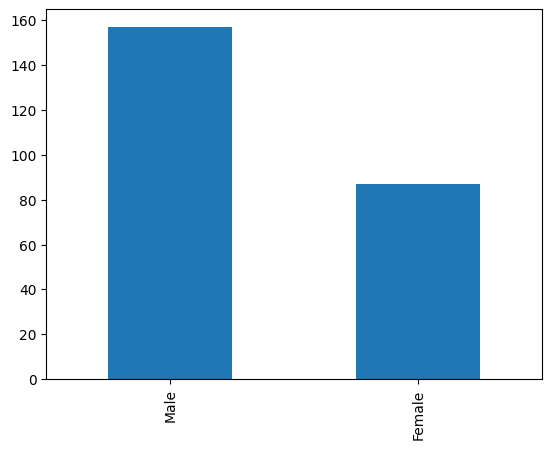

In [5]:
df.sex.value_counts().plot(kind='bar');

A bar graph is a mathematical picture in which different amounts are represented by vertical (or horizontal) rectangles that have the same width but different heights or lengths.

rot=True rotates the axis labels.

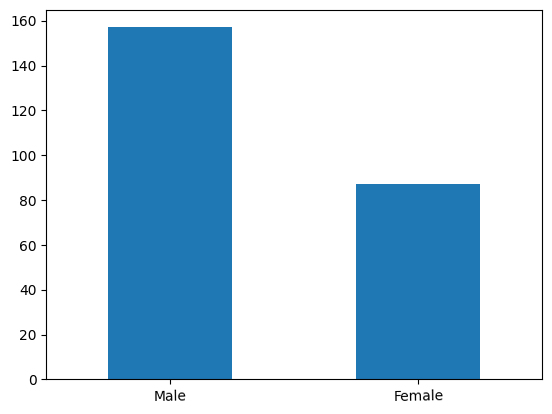

In [6]:
df.sex.value_counts().plot(kind='bar',rot=True);

We can represent the same information using a horizontal graph:

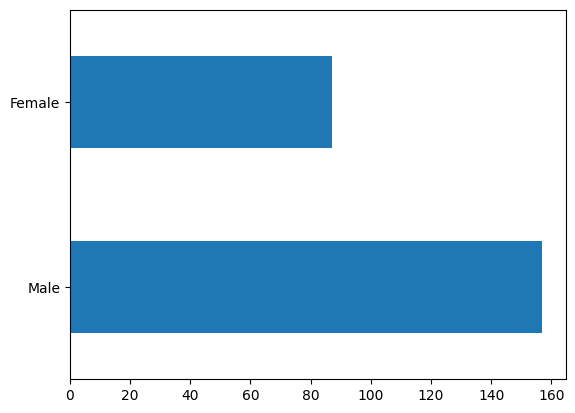

In [7]:
df.sex.value_counts().plot(kind='barh');

A pie chart is a type of graph in which a circle is divided into sectors that each represent a proportion of the whole.

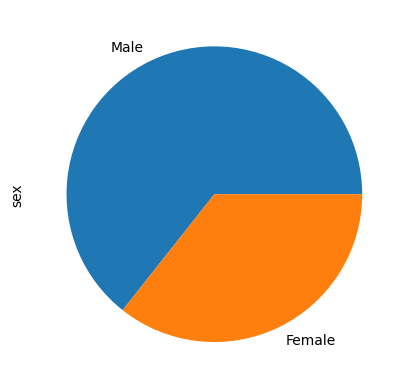

In [8]:
df.sex.value_counts().plot(kind='pie');

We can include a title:

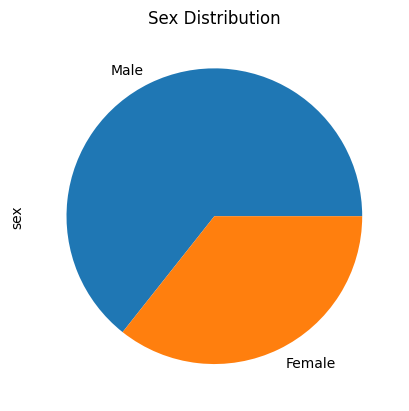

In [9]:
df.sex.value_counts().plot(kind='pie',title='Sex Distribution');

### Smokers vs. non-smokers

We can apply the procedure to another variable:

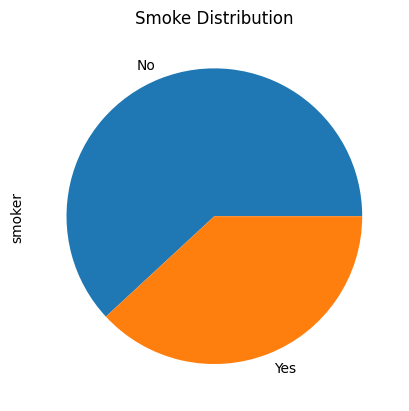

In [10]:
df.smoker.value_counts().plot(kind='pie',title='Smoke Distribution');

We can create more complex graphs involving two variables.

First, let's get the data:

In [11]:
pd.crosstab(df.sex, df.smoker)

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


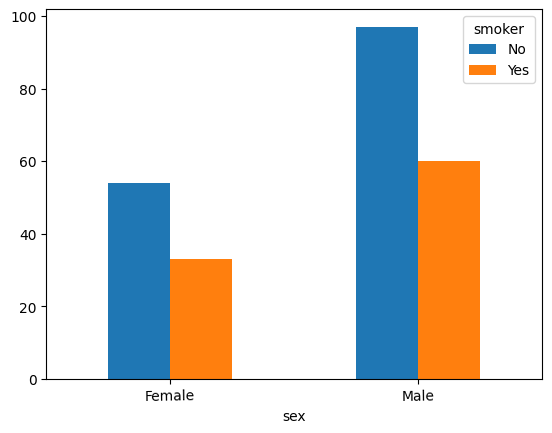

In [12]:
pd.crosstab(df.sex, df.smoker).plot(kind='bar',rot=True);

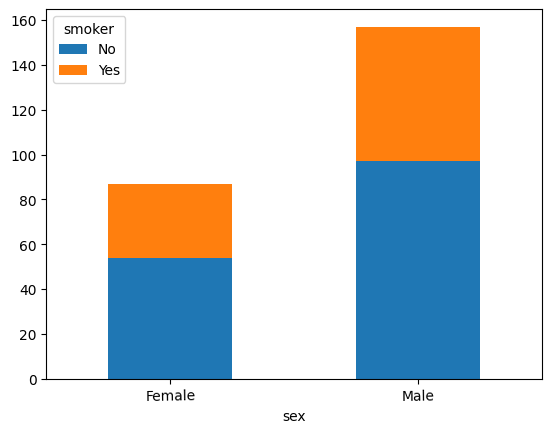

In [13]:
pd.crosstab(df.sex, df.smoker).plot(kind='bar',rot=True, stacked = True);

### Analyzing `day` and `time`

Relating the variables day and time:

In [14]:
pd.crosstab(df.day, df.time)

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


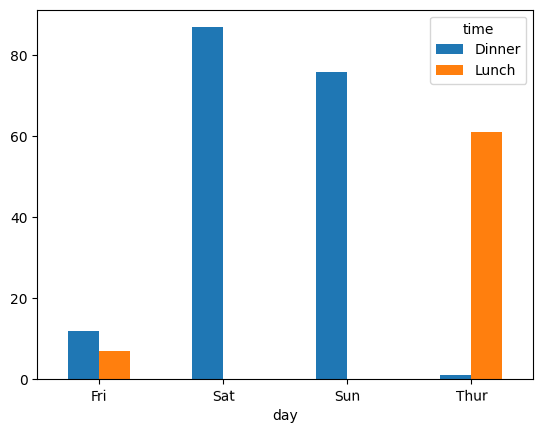

In [15]:
pd.crosstab(df.day, df.time).plot(kind='bar',rot=True);

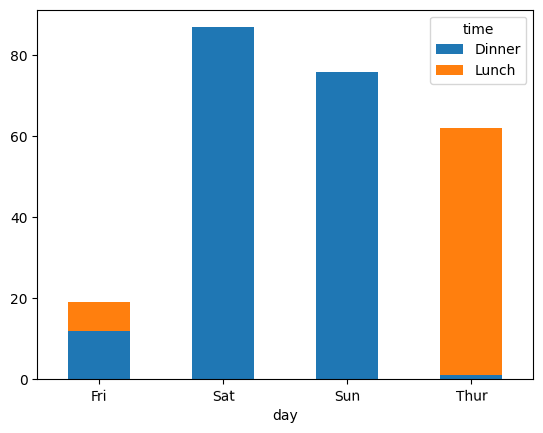

In [16]:
pd.crosstab(df.day, df.time).plot(kind='bar',rot=True, stacked = True);

### Histograms

A histogram is an approximate representation of the distribution of numerical variables. It looks pretty much like a bar chart, but it is not.

A histogram is a graph of a frequency distribution in which rectangles with bases on the horizontal axis are given widths equal to the class intervals and heights equal to the corresponding frequencies. 

To construct a histogram, you need to divide the entire range of values into a series of intervals (or bins), and count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size.

total_bill is a numerical variable. We can plot an histogram:

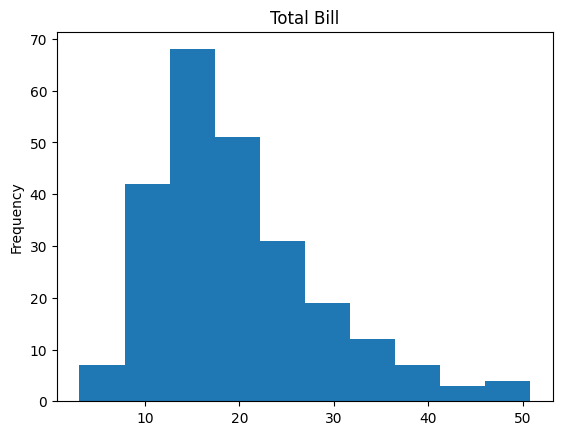

In [17]:
df.total_bill.plot(kind='hist', title='Total Bill');

The bins parameter is the number of intervals used in the histogram. We can change it:

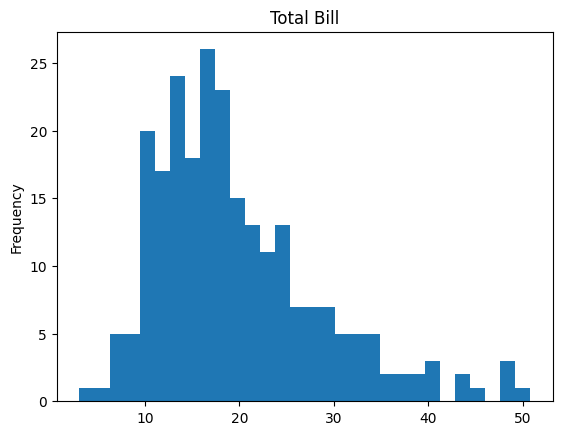

In [18]:
df.total_bill.plot(kind='hist', bins=30, title='Total Bill');

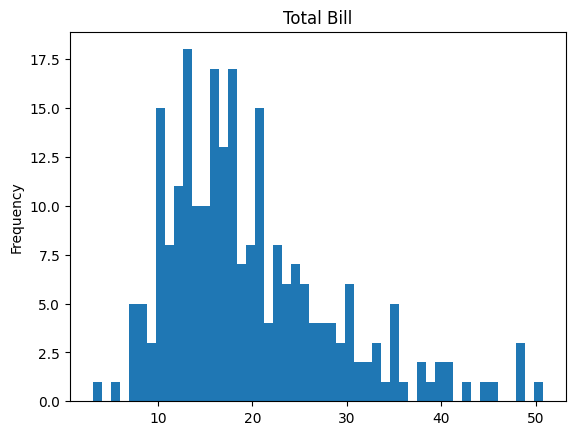

In [19]:
df.total_bill.plot(kind='hist', bins=50, title='Total Bill');

### KDE Plot

Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

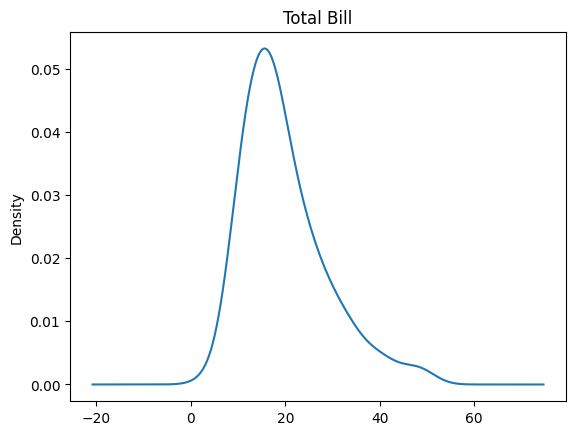

In [20]:
df.total_bill.plot(kind='density', title='Total Bill');

### Area Plot

This is an area plot:

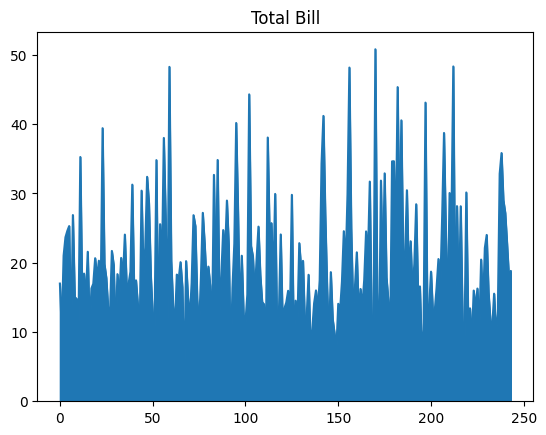

In [21]:
df.total_bill.plot(kind='area', title='Total Bill');

We can modify the size of the figure:

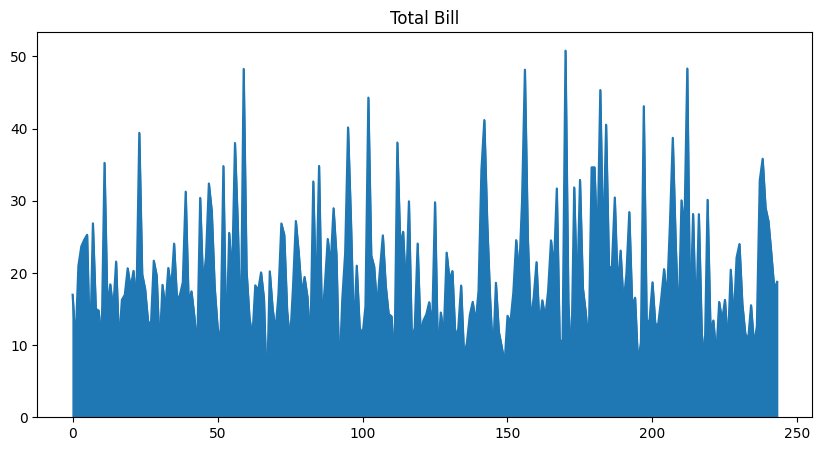

In [22]:
df.total_bill.plot(kind='area',figsize=(10,5), title='Total Bill');

### Line Plot

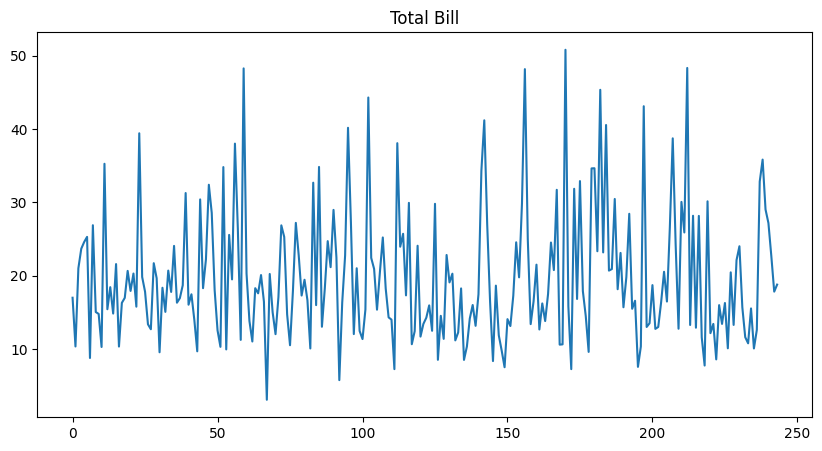

In [23]:
df.total_bill.plot(kind='line',figsize=(10,5), title='Total Bill');

### Boxplots

We can graph a boxplot.

Boxplot is a method for graphing a numerical variable using their quartile information, which means first quartile (25%), median (50%), and third quartile (75%). 

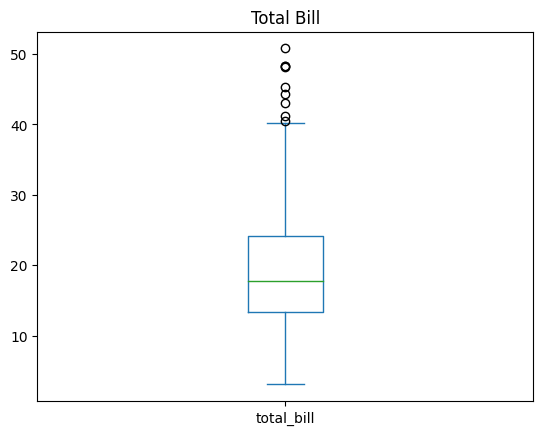

In [24]:
df.total_bill.plot(kind='box', title='Total Bill');

You can graph two boxplots and compare them among groups:

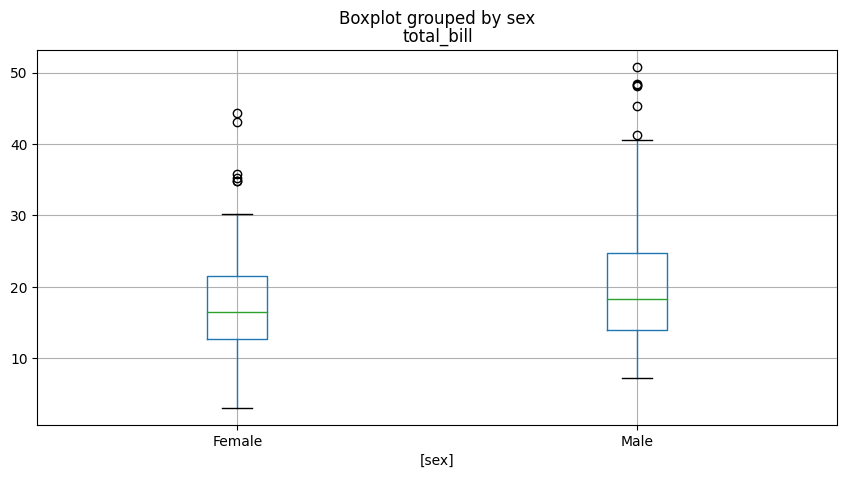

In [25]:
df.boxplot(column=['total_bill'], by=['sex'], figsize=(10,5));

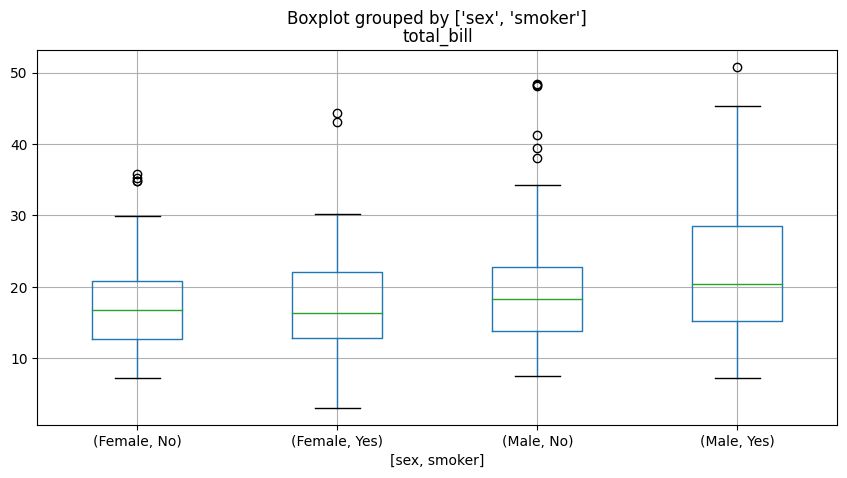

In [26]:
df.boxplot(column=['total_bill'], by=['sex','smoker'], figsize=(10,5));

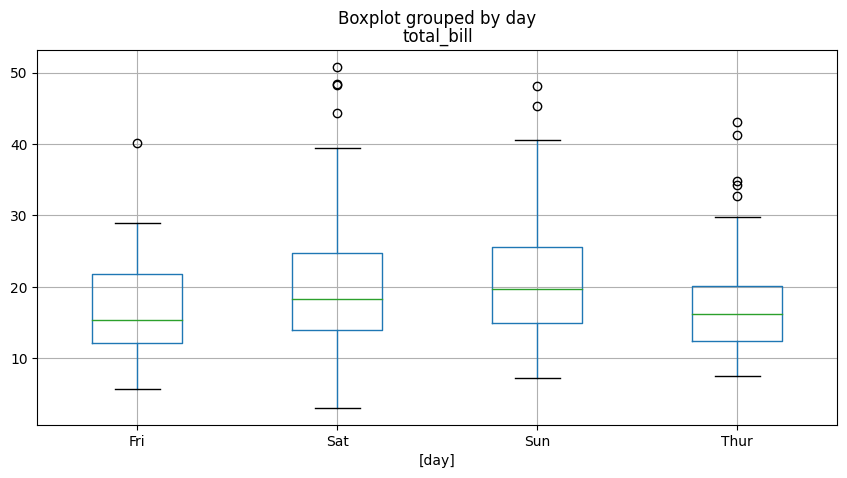

In [27]:
df.boxplot(column=['total_bill'], by=['day'], figsize=(10,5));

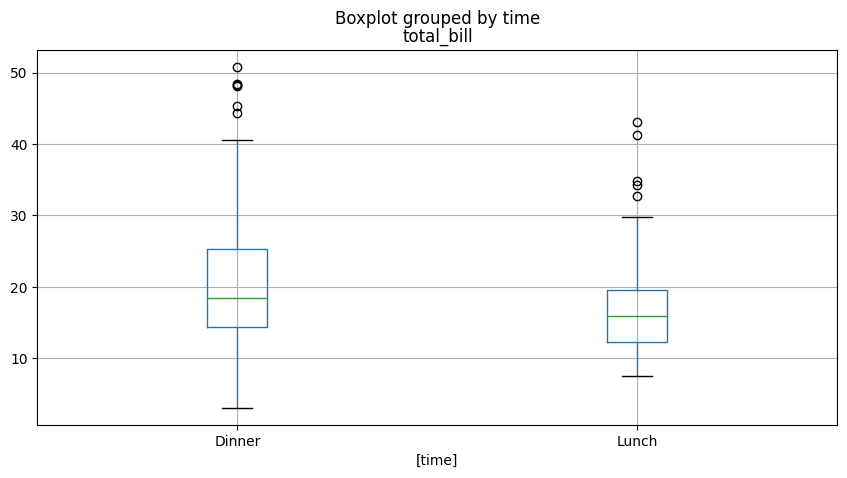

In [28]:
df.boxplot(column=['total_bill'], by=['time'], figsize=(10,5));

### Scatterplots

A scatter plot is a graph in which the values of two numerical variables are plotted along two axes.

We can plot a scatter between total_bill and tip:

Plotting a scatter between total_bill and tip:

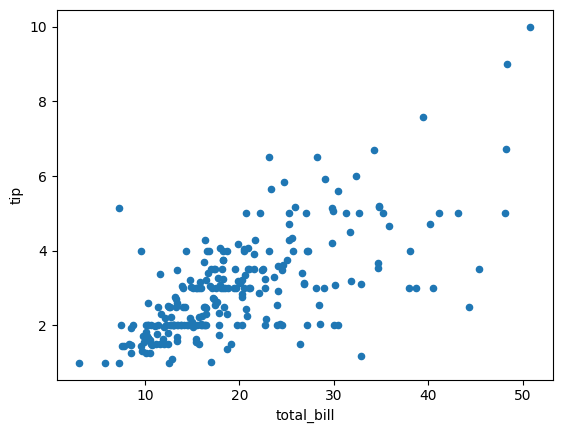

In [29]:
df.plot('total_bill','tip',kind='scatter');

## Conclusions

Key Takeaways:
- Bar graphs depicting the sex distribution show a higher number of male patrons than females, illustrating the gender disparity among the dataset's observations.
- Pie charts visualizing the smoker status distribution highlight that non-smokers form a larger dataset segment, effectively demonstrating the proportion of smokers to non-smokers.
- Histograms and KDE plots effectively visualize the distribution of total bills and tips, revealing the data's underlying distribution.
- Crosstabulations between categorical variables like sex and smoker status and day and time provide insightful visual comparisons through stacked and unstacked bar charts.
- Box plots and scatter plots help examine the distribution of numerical variables across different categories and the relationship between variables, respectively, highlighting the versatility of pandas in handling both simple and complex visualizations.
- These visualizations underscore the importance of visual data exploration in uncovering patterns, distributions, and relationships within the data.

## References

- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc. chapter 4